In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id1='1lmufFI9aDQcTLyiqjJVhOspYM7olhbH1'
downloaded1 = drive.CreateFile({'id': id1})
downloaded1.GetContentFile('orange_small_train.data')

id2='1J4ePx792hvmcgjACwUI0dokrOnmMd96P'
downloaded1 = drive.CreateFile({'id': id2})
downloaded1.GetContentFile('orange_small_train_churn.labels')


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
train=pd.read_csv('orange_small_train.data',sep='\t')

In [0]:
train['churn']=pd.read_csv('orange_small_train_churn.labels',header=None)
train['appetency']=pd.read_csv('orange_small_train_appetency.labels',header=None)
train['upselling']=pd.read_csv('orange_small_train_upselling.labels',header=None)


In [239]:
train.head(5)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,...,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var209,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,churn,appetency,upselling
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,NaN,NaN,184.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464.0,580.0,NaN,14.0,128.0,NaN,NaN,166.56,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,3570.0,NaN,NaN,...,NaN,taul,1K8T,lK27,ka_ns41,nQUveAzAF7,NaN,NaN,dXGu,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,NaN,uKAI,L84s,XfqtO3UdzaXh_,NaN,NaN,NaN,XTbPUYD,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,-1,-1,-1
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,210.0,NaN,2.0,24.0,NaN,NaN,353.52,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4764966.0,NaN,NaN,...,NaN,taul,1K8T,2Ix5,qEdASpP,y2LIM01bE1,NaN,NaN,lg1t,9_Y1,k13i,sJzTlal,zm5i,me75fM6ugJ,kIsH,NaN,uKAI,L84s,NhsEn4L,NaN,NaN,NaN,kZJyVg2,NaN,NaN,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN,1,-1,-1
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,NaN,NaN,904.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1212.0,1515.0,NaN,26.0,816.0,NaN,NaN,220.08,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,5883894.0,NaN,NaN,...,SEuy,taul,1K8T,ffXs,NldASpP,y4g9XoZ,vynJTq9,smXZ,4bTR,9_Y1,MGOA,VpdQ,haYg,DHn_WUyBhW_whjA88g9bvA64_,kIsH,NaN,uKAI,L84s,UbxQ8lZ,NaN,TTGHfSv,NaN,pMWAe2U,bHR7,UYBR,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN,-1,-1,-1
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,22.08,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,taul,1K8T,ssAy,_ybO0dd,4hMlgkf58mhwh,NaN,NaN,W8mQ,9_Y1,YULl,VpdQ,NaN,me75fM6ugJ,kIsH,NaN,uKAI,Mtgm,NhsEn4L,NaN,NaN,NaN,kq0dQfu,eKej,UYBR,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN,-1,-1,-1
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,NaN,NaN,3216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,80.0,NaN,4.0,64.0,NaN,NaN,200.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,SEuy,taul,1K8T,uNkU,EKR938I,ThrHXVS,0v21jmy,smXZ,xklU,9_Y1,RVjC,sJzTlal,6JmL,me75fM6ugJ,kIsH,NaN,uKAI,L84s,XfqtO3UdzaXh_,NaN,SJs3duv,NaN,11p4mKe,H3p7,UYBR,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN,-1,-1,-1


(array([ 31.,  38.,   1.,   0.,   2.,   5.,   0.,   2.,   0., 154.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

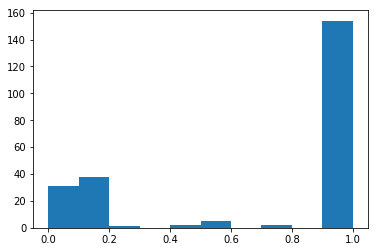

In [240]:
x=train.isnull().sum()/train.shape[0]

plt.hist(x)

Here we have many columns which has all values Null so we will be removing those values . Around 28 columns only ehich have no null values and 154 columns which have all null values

In [241]:
train.shape

(50000, 233)

Removing the columns whose null values are more than 80%

In [0]:
columns= [cols for cols in train if train[cols].isnull().sum()/train.shape[0] > 0.50]

Dropping Those columns

In [0]:
train.drop(columns,axis=1,inplace =True)

In [244]:
len(train.columns)

72

In [245]:
train.dtypes

Var6         float64
Var7         float64
Var13        float64
Var21        float64
Var22        float64
Var24        float64
Var25        float64
Var28        float64
Var35        float64
Var38        float64
Var44        float64
Var57        float64
Var65        float64
Var72        float64
Var73          int64
Var74        float64
Var76        float64
Var78        float64
Var81        float64
Var83        float64
Var85        float64
Var94        float64
Var109       float64
Var112       float64
Var113       float64
Var119       float64
Var123       float64
Var125       float64
Var126       float64
Var132       float64
              ...   
Var193        object
Var195        object
Var196        object
Var197        object
Var198        object
Var199        object
Var202        object
Var203        object
Var204        object
Var205        object
Var206        object
Var207        object
Var208        object
Var210        object
Var211        object
Var212        object
Var216       

In [246]:
train['Var192'].value_counts()

qFpmfo8zhV    385
DHeq9ayfAo    384
zKnr4RXktW    380
8I1r4RXXnK    379
HYTrjIK12c    379
75lr4RXktW    377
1GdOj1KXzC    376
2jirEyXktW    373
CxSr4RXktW    369
oyGrjIXt5a    368
vAsgUHXM47    368
hSogUHXZeb    367
vAsTmBfHUn    363
ZSNrjIX0Db    362
dRavyx7ejg    360
xearjIX0Db    352
avkq9ayfAo    351
wRXmfo875g    349
LDPvyx7IEC    348
crIt0Go8Lb    348
FoxgUHSK8h    348
P1WvyxLp3Z    348
KXMrEyXXnK    347
tr0rEyXktW    346
4e7gUH7IEC    340
vAsvyx7ejg    337
Yddq9ayE15    337
8Iqt0G8rTN    336
0vimfo8zhV    335
Foxt0Go8Lb    335
             ... 
HYTgUHXM47      1
xlbmfoTlru      1
0kQqrQsiZt      1
avkq9at_88      1
mHEr4RfJaT      1
NESBcmRZ57      1
F42vyxTlru      1
Gb9t0GQ5Yy      1
j6SmfoVBLR      1
NESWq6IHzm      1
hSogUHQicn      1
E_tZptzyxY      1
1fZWq6wFxs      1
8I1TmB9iKe      1
0G9vyxdMWg      1
FAJrEyXktW      1
rY9gUHQfP4      1
0kQTmBU3gb      1
vSSt0Gq076      1
hSovyxdtN_      1
crIgUHf2Df      1
yaKt0Gq076      1
xOXrjIU0M6      1
2jfvyxUZHQ      1
ym_vyxTlru

columns which have Object Datatype

In [0]:
cols=[col for col in train if train[col].dtype=='O']
#Columns with categories / different values less than 500 is used so that we can covert it into one hot or something like that
cols_new=[i for i in cols if train[i].nunique() < 500]      

In [0]:
train_cat=train[cols_new]

Handling missing categorical values

In [249]:
train_cat.isnull().sum()
train_cat['Var192'].value_counts()

qFpmfo8zhV    385
DHeq9ayfAo    384
zKnr4RXktW    380
8I1r4RXXnK    379
HYTrjIK12c    379
75lr4RXktW    377
1GdOj1KXzC    376
2jirEyXktW    373
CxSr4RXktW    369
oyGrjIXt5a    368
vAsgUHXM47    368
hSogUHXZeb    367
vAsTmBfHUn    363
ZSNrjIX0Db    362
dRavyx7ejg    360
xearjIX0Db    352
avkq9ayfAo    351
wRXmfo875g    349
LDPvyx7IEC    348
crIt0Go8Lb    348
FoxgUHSK8h    348
P1WvyxLp3Z    348
KXMrEyXXnK    347
tr0rEyXktW    346
4e7gUH7IEC    340
vAsvyx7ejg    337
Yddq9ayE15    337
8Iqt0G8rTN    336
0vimfo8zhV    335
Foxt0Go8Lb    335
             ... 
HYTgUHXM47      1
xlbmfoTlru      1
0kQqrQsiZt      1
avkq9at_88      1
mHEr4RfJaT      1
NESBcmRZ57      1
F42vyxTlru      1
Gb9t0GQ5Yy      1
j6SmfoVBLR      1
NESWq6IHzm      1
hSogUHQicn      1
E_tZptzyxY      1
1fZWq6wFxs      1
8I1TmB9iKe      1
0G9vyxdMWg      1
FAJrEyXktW      1
rY9gUHQfP4      1
0kQTmBU3gb      1
vSSt0Gq076      1
hSovyxdtN_      1
crIgUHf2Df      1
yaKt0Gq076      1
xOXrjIU0M6      1
2jfvyxUZHQ      1
ym_vyxTlru

In [250]:
train_cat['Var223']

0        jySVZNlOJy
1        LM8l689qOp
2        jySVZNlOJy
3        LM8l689qOp
4        LM8l689qOp
5        LM8l689qOp
6        LM8l689qOp
7               NaN
8        jySVZNlOJy
9        LM8l689qOp
10       LM8l689qOp
11       LM8l689qOp
12       LM8l689qOp
13       LM8l689qOp
14       LM8l689qOp
15       LM8l689qOp
16       jySVZNlOJy
17       LM8l689qOp
18       jySVZNlOJy
19       LM8l689qOp
20       LM8l689qOp
21              NaN
22       LM8l689qOp
23       jySVZNlOJy
24       jySVZNlOJy
25       LM8l689qOp
26              NaN
27       LM8l689qOp
28              NaN
29       LM8l689qOp
            ...    
49970    LM8l689qOp
49971           NaN
49972    LM8l689qOp
49973    LM8l689qOp
49974    LM8l689qOp
49975    LM8l689qOp
49976    LM8l689qOp
49977    LM8l689qOp
49978    LM8l689qOp
49979    LM8l689qOp
49980    LM8l689qOp
49981    LM8l689qOp
49982    LM8l689qOp
49983    LM8l689qOp
49984    LM8l689qOp
49985          M_8D
49986    jySVZNlOJy
49987    LM8l689qOp
49988    LM8l689qOp


After checkimg the columns Var192 and Var223 we noticed to handle the missing values we have use ffill because we cannot replace by maximum number of occured.

In [0]:
train_cat=train_cat.ffill(axis=0)

In [252]:
train_cat.isnull().sum()

Var192    0
Var193    0
Var195    0
Var196    0
Var197    0
Var203    0
Var204    0
Var205    0
Var206    0
Var207    0
Var208    0
Var210    0
Var211    0
Var212    0
Var218    0
Var219    0
Var221    0
Var223    0
Var226    0
Var227    0
Var228    0
dtype: int64

So no Null values we have till now in categorical columns 

In [0]:
train_num=train.drop(cols,axis=1)

In [254]:
train_num.columns

Index(['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25', 'Var28',
       'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var72', 'Var73', 'Var74',
       'Var76', 'Var78', 'Var81', 'Var83', 'Var85', 'Var94', 'Var109',
       'Var112', 'Var113', 'Var119', 'Var123', 'Var125', 'Var126', 'Var132',
       'Var133', 'Var134', 'Var140', 'Var143', 'Var144', 'Var149', 'Var153',
       'Var160', 'Var163', 'Var173', 'Var181', 'churn', 'appetency',
       'upselling'],
      dtype='object')

In [255]:
train_num.isnull().sum()

Var6          5529
Var7          5539
Var13         5539
Var21         5529
Var22         5009
Var24         7230
Var25         5009
Var28         5011
Var35         5009
Var38         5009
Var44         5009
Var57            0
Var65         5539
Var72        22380
Var73            0
Var74         5539
Var76         5009
Var78         5009
Var81         5529
Var83         5009
Var85         5009
Var94        22380
Var109        7230
Var112        5009
Var113           0
Var119        5529
Var123        5009
Var125        5539
Var126       13920
Var132        5009
Var133        5009
Var134        5009
Var140        5539
Var143        5009
Var144        5529
Var149        7230
Var153        5009
Var160        5009
Var163        5009
Var173        5009
Var181        5009
churn            0
appetency        0
upselling        0
dtype: int64

In [0]:
for i in train_num.columns:
    train_num[i].fillna(train_num[i].mean(),inplace=True)

In [257]:
print(train_cat.shape)
print(train_num.shape)

(50000, 21)
(50000, 44)


In [0]:
train_final=pd.concat([train_num,train_cat],axis=1)

Predicting Class change

In [0]:
train_final['churn']=(train_final['churn']+1)/2
train_final['appetency']=(train_final['appetency']+1)/2
train_final['upselling']=(train_final['upselling']+1)/2

In [0]:
train_final['churn']=train_final['churn'].astype('int')
train_final['appetency']=train_final['appetency'].astype('int')
train_final['upselling']=train_final['upselling'].astype('int')

In [0]:
trai,tes = train_test_split(train_final,test_size=0.2)

In [0]:
from sklearn.model_selection import train_test_split
X_train = trai.drop(['churn','appetency','upselling'],axis=1)
X_test = tes.drop(['churn','appetency','upselling'],axis=1)

y_train     = trai['churn']
y_test      = tes['churn']
y_train_app  = trai['appetency']
y_test_app = tes['appetency']
y_train_up  = trai['upselling']
y_test_up = tes['upselling']


In [263]:
X_test.shape

(10000, 62)

##Categorical features

We have 21 categorical features so if we assume on an average if each columncorreponds to 100 features so maximum features will be 2100 . Not Bad :)

In [0]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import bisect
from scipy.sparse import hstack

In [265]:
train_cat.columns

Index(['Var192', 'Var193', 'Var195', 'Var196', 'Var197', 'Var203', 'Var204',
       'Var205', 'Var206', 'Var207', 'Var208', 'Var210', 'Var211', 'Var212',
       'Var218', 'Var219', 'Var221', 'Var223', 'Var226', 'Var227', 'Var228'],
      dtype='object')

In [266]:
#https://stackoverflow.com/questions/40321232/handling-unknown-values-for-label-encoding
le=LabelEncoder()
X_train['Var192']=le.fit_transform(X_train['Var192'])
X_test['Var192'] = X_test['Var192'].map(lambda s: 'other' if s not in le.classes_ else s)
le_classes = le.classes_.tolist()
bisect.insort_left(le_classes, 'other')
le.classes_ = le_classes
    
X_test['Var192']=le.transform(X_test['Var192'])
    
ohe=OneHotEncoder(handle_unknown='ignore')
X_tr = ohe.fit_transform(X_train['Var192'].values.reshape(-1,1))
X_te = ohe.transform(X_test['Var192'].values.reshape(-1,1))

flag=0    
for i in train_cat.columns:
  
  if (flag!=0):

        le = LabelEncoder()
        X_train[i]=le.fit_transform(X_train[i])
        X_test[i] = X_test[i].map(lambda s: 'other' if s not in le.classes_ else s)
        le_classes = le.classes_.tolist()
        bisect.insort_left(le_classes, 'other')
        le.classes_ = le_classes
        X_test[i]=le.transform(X_test[i])
        ohe=OneHotEncoder(handle_unknown='ignore')
        print(i)
        X_tri = ohe.fit_transform(X_train[i].values.reshape(-1,1))
        X_tei = ohe.transform(X_test[i].values.reshape(-1,1))
        X_tr=hstack((X_tr,X_tri))
        X_te=hstack((X_te,X_tei))

  flag=1        

Var193
Var195
Var196
Var197
Var203
Var204
Var205
Var206
Var207
Var208
Var210
Var211
Var212
Var218
Var219
Var221
Var223
Var226
Var227
Var228


GridSearch

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
para = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}
clf = GridSearchCV(model, para, cv=5, scoring='roc_auc',return_train_score=True)
clf.fit(X_tr, y_train)
train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score']

NameError: name 'X_tr' is not defined

In [0]:
from xgboost import XGBClassifier
model=XGBClassifier(n_estimators=100,max_depth=2,class_weight='balanced')
model.fit(X_tr, y_train)

y_test_pred = model.predict_proba(X_te)
roc_auc_score(y_test, y_test_pred[:,1])

0.6197069181951065

In [0]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
model=RandomForestClassifier(n_estimators = 100, random_state = 0)
model.fit(X_tr, y_train)
y_test_pred = model.predict_proba(X_te)
roc_auc_score(y_test, y_test_pred[:,1])

0.5378825184819434

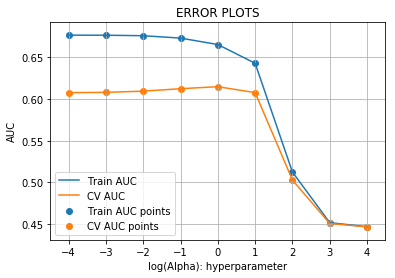

In [0]:
from math import log
Alpha=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
plt.plot([log(y,10) for y in Alpha], train_auc, label='Train AUC')
plt.plot([log(y,10) for y in Alpha], cv_auc, label='CV AUC')
plt.scatter([log(y,10) for y in Alpha], train_auc, label='Train AUC points')
plt.scatter([log(y,10) for y in Alpha], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("log(Alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

##Numerical Features

In [0]:
from sklearn.preprocessing import MinMaxScaler
  
for i in train_num.columns:
  if i!='churn':
    if i!='appetency':
      if i!='upselling':

          m = MinMaxScaler()
          X_train[i]=m.fit_transform(X_train[i].values.reshape(-1,1))   
          X_test[i]=m.transform(X_test[i].values.reshape(-1,1))
      


In [0]:
cols=[i for i in train_cat.columns if i not in ['churn','appetency','upselling']]
X_tr_num=X_train.drop(cols,axis=1)
X_te_num=X_test.drop(cols,axis=1)

In [269]:
X_tr_num.columns

Index(['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25', 'Var28',
       'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var72', 'Var73', 'Var74',
       'Var76', 'Var78', 'Var81', 'Var83', 'Var85', 'Var94', 'Var109',
       'Var112', 'Var113', 'Var119', 'Var123', 'Var125', 'Var126', 'Var132',
       'Var133', 'Var134', 'Var140', 'Var143', 'Var144', 'Var149', 'Var153',
       'Var160', 'Var163', 'Var173', 'Var181'],
      dtype='object')

In [69]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
model=XGBClassifier(n_estimators = 100,max_depth=2, random_state = 0)
model.fit(X_tr_num, y_train)
y_test_pred = model.predict_proba(X_te_num)
roc_auc_score(y_test, y_test_pred[:,1])

0.7186206592728834

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
para = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}
clf = GridSearchCV(model, para, cv=5, 
                   
                   scoring='roc_auc',return_train_score=True)
clf.fit(X_tr_num, y_train)
train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score']

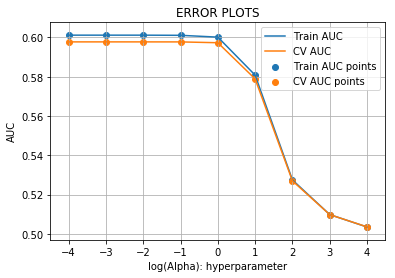

In [0]:
from math import log
Alpha=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
plt.plot([log(y,10) for y in Alpha], train_auc, label='Train AUC')
plt.plot([log(y,10) for y in Alpha], cv_auc, label='CV AUC')
plt.scatter([log(y,10) for y in Alpha], train_auc, label='Train AUC points')
plt.scatter([log(y,10) for y in Alpha], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("log(Alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## Categorical + Numerical

In [0]:
X_tr_final = hstack((X_tr_num,X_tr))
X_te_final = hstack((X_te_num,X_te))

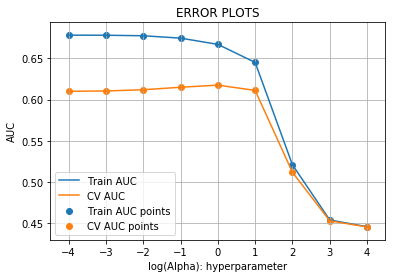

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
para = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}
clf = GridSearchCV(model, para, cv=5, scoring='roc_auc',return_train_score=True)
clf.fit(X_tr_final, y_train)
train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score']
from math import log
Alpha=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
plt.plot([log(y,10) for y in Alpha], train_auc, label='Train AUC')
plt.plot([log(y,10) for y in Alpha], cv_auc, label='CV AUC')
plt.scatter([log(y,10) for y in Alpha], train_auc, label='Train AUC points')
plt.scatter([log(y,10) for y in Alpha], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("log(Alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [0]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

model=DecisionTreeClassifier(criterion='gini', splitter='random')

para = {'max_depth':[1, 5, 10, 50, 100, 500,1000],'min_samples_split':[5, 10, 100, 500]}

clf = GridSearchCV(model, para, cv=3, scoring='roc_auc',return_train_score=True,verbose=2,n_jobs=40)
clf.fit(X_tr_final, y_train)
train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score']


Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  48 out of  84 | elapsed:  4.0min remaining:  3.0min
[Parallel(n_jobs=40)]: Done  84 out of  84 | elapsed:  5.2min finished


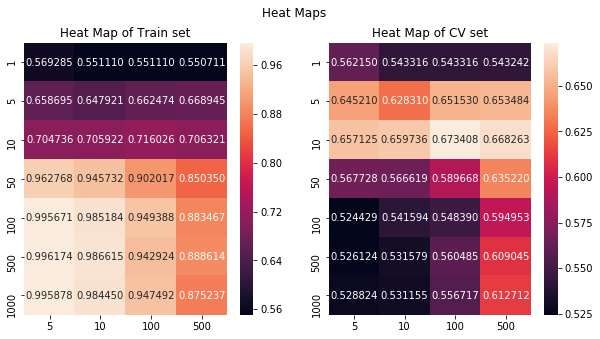

In [0]:
import seaborn as sns
import numpy as np
fig, (left, right) = plt.subplots(ncols=2, figsize=(10, 5))
t_auc=np.array(train_auc).reshape(7,4)
a=sns.heatmap(t_auc,annot=True,fmt="f",xticklabels=min_split, yticklabels=Depth,ax=left)
left.set_title('Heat Map of Train set')
c_auc=np.array(cv_auc).reshape(7,4)
b=sns.heatmap(c_auc,annot=True,fmt="f",xticklabels=min_split, yticklabels=Depth,ax=right)
right.set_title('Heat Map of CV set')
fig.suptitle("Heat Maps")
plt.show()

In [0]:
from xgboost import XGBClassifier
parameters = {'n_estimators':[5,10,50,100,250] , 'max_depth' :[2,4,10,20]}
xb1=XGBClassifier(class_weight='balanced')
clf1=GridSearchCV(xb1,parameters,cv=2,scoring='roc_auc',return_train_score=True,verbose=10,n_jobs=40)
clf1.fit(X_tr_final,y_train)
train_auc= clf1.cv_results_['mean_train_score']
cv_auc = clf1.cv_results_['mean_test_score']

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   1 tasks      | elapsed:   11.1s
[Parallel(n_jobs=40)]: Done   6 out of  40 | elapsed:   49.3s remaining:  4.7min
[Parallel(n_jobs=40)]: Done  11 out of  40 | elapsed:  1.4min remaining:  3.7min
[Parallel(n_jobs=40)]: Done  16 out of  40 | elapsed:  1.8min remaining:  2.6min
[Parallel(n_jobs=40)]: Done  21 out of  40 | elapsed:  2.5min remaining:  2.3min
[Parallel(n_jobs=40)]: Done  26 out of  40 | elapsed:  3.3min remaining:  1.8min
[Parallel(n_jobs=40)]: Done  31 out of  40 | elapsed:  5.0min remaining:  1.4min
[Parallel(n_jobs=40)]: Done  36 out of  40 | elapsed:  6.8min remaining:   45.2s
[Parallel(n_jobs=40)]: Done  40 out of  40 | elapsed:  8.2min finished


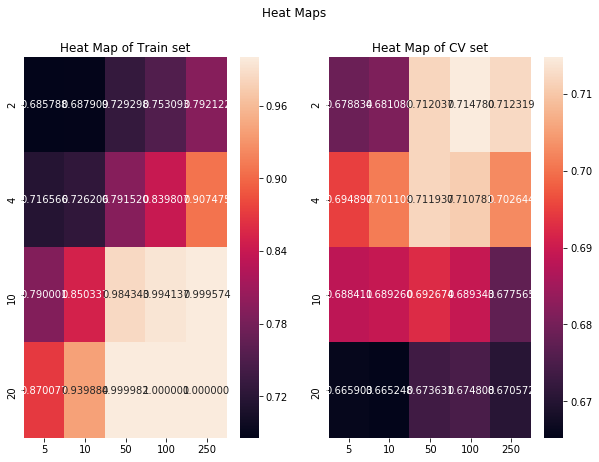

In [0]:
fig, (left, right) = plt.subplots(ncols=2, figsize=(10, 7))
t_auc=np.array(train_auc).reshape(4,5)
a=sns.heatmap(t_auc,annot=True,fmt="f",xticklabels=parameters['n_estimators'], yticklabels=parameters['max_depth'],ax=left)
left.set_title('Heat Map of Train set')
c_auc=np.array(cv_auc).reshape(4,5)
b=sns.heatmap(c_auc,annot=True,fmt="f",xticklabels=parameters['n_estimators'], yticklabels=parameters['max_depth'],ax=right)

right.set_title('Heat Map of CV set')
fig.suptitle("Heat Maps")
plt.show()

In [0]:
def batch_predict(clf, data):
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
      y_data_pred = []
      tr_loop = data.shape[0] - data.shape[0]%1000
      # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
      # in this for loop we will iterate unti the last 1000 multiplier
      for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
        # we will be predicting for the last data points
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])

      return y_data_pred

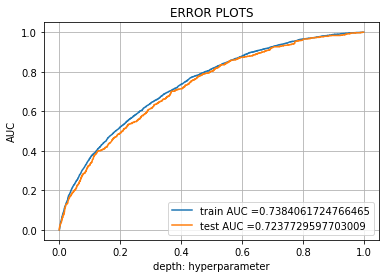

In [0]:
from sklearn.metrics import roc_curve,auc
best_esti=100
best_depth=2
xg4=XGBClassifier(n_estimators=best_esti,max_depth=best_depth,n_jobs=-1,class_weight='balanced')
xg4.fit(X_tr_final,y_train)

y_train_pred = batch_predict(xg4,X_tr_final.tocsr())
y_test_pred = batch_predict(xg4,X_te_final.tocsr())

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
#Credits:AppliedaAIcourse.com
from sklearn.metrics import confusion_matrix
def predict(proba, threshould, fpr, tpr):
  t = threshould[np.argmax(fpr*(1-tpr))]
  # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
  predictions = []
  for i in proba:
    if i>=t:
      predictions.append(1)
    else:
      predictions.append(0)
    return predictions

In [0]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
model=XGBClassifier(n_estimators = 100,max_depth=2, random_state = 0)
model.fit(X_tr_final, y_train)
y_test_pred = model.predict_proba(X_te_final)
roc_auc_score(y_test, y_test_pred[:,1])

0.7265878086083746

0.8251691343843911

In [92]:
from sklearn.metrics import accuracy_score
y_test_pred = model.predict(X_te)
accuracy_score(y_test, y_test_pred)

0.9265

In [0]:
model=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001, loss='deviance', max_depth=7,
              max_features=25, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=40, min_samples_split=300,
              min_weight_fraction_leaf=0.0, n_estimators=10000,presort='auto', random_state=0,
              subsample=0.8000000000000002, 
               verbose=0, warm_start=False)
model.fit(X_tr_final, y_train)
y_test_pred = model.predict_proba(X_te_final)
roc_auc_score(y_test, y_test_pred[:,1])

0.7096949951205049

In [0]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(1024, 256, 64, 16),
    activation="relu",
    max_iter=int(1e+3),
    early_stopping=True,
    validation_fraction=0.2,
    n_iter_no_change=50,
    random_state=2,
    verbose=True,
)
mlp.fit(X_tr_final, y_train)
y_test_pred = mlp.predict_proba(X_te_final)


Iteration 1, loss = 0.27214162
Validation score: 0.926375
Iteration 2, loss = 0.24798246
Validation score: 0.926375
Iteration 3, loss = 0.24047966
Validation score: 0.926375
Iteration 4, loss = 0.22143650
Validation score: 0.922125
Iteration 5, loss = 0.18512248
Validation score: 0.905875
Iteration 6, loss = 0.14387142
Validation score: 0.903375
Iteration 7, loss = 0.10792924
Validation score: 0.899750
Iteration 8, loss = 0.07846820
Validation score: 0.894750
Iteration 9, loss = 0.06431966
Validation score: 0.902125
Iteration 10, loss = 0.05080494
Validation score: 0.899000
Iteration 11, loss = 0.04420899
Validation score: 0.907250
Iteration 12, loss = 0.03569792
Validation score: 0.897375
Iteration 13, loss = 0.03012783
Validation score: 0.911625
Iteration 14, loss = 0.02534483
Validation score: 0.903125
Iteration 15, loss = 0.02385410
Validation score: 0.892000
Iteration 16, loss = 0.01912793
Validation score: 0.897000
Iteration 17, loss = 0.01829523
Validation score: 0.897000
Iterat

NameError: ignored

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_test_pred[:,1])

0.626717914277289

In [0]:
X_tr_final.shape

(40000, 1010)

##MLP Classifier

Upsampling the data

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc

model=MLPClassifier(hidden_layer_sizes=(130,75,50,30,10),batch_size=500,max_iter=500)

para = {'learning_rate_init':[0.1,0.01,0.001]}

clf = GridSearchCV(model, para, cv=3, scoring='roc_auc',return_train_score=True,verbose=2,n_jobs=40)
clf.fit(X_tr_num, y_train)
train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score']


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   5 out of   9 | elapsed:  9.4min remaining:  7.5min
[Parallel(n_jobs=40)]: Done   9 out of   9 | elapsed: 10.9min finished


In [0]:
cv_auc

array([0.5       , 0.61635579, 0.59532081])

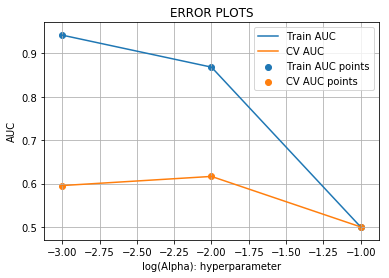

In [0]:
from math import log
lr=[0.1,0.01,0.001]
plt.plot([log(y,10) for y in lr], train_auc, label='Train AUC')
plt.plot([log(y,10) for y in lr], cv_auc, label='CV AUC')
plt.scatter([log(y,10) for y in lr], train_auc, label='Train AUC points')
plt.scatter([log(y,10) for y in lr], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("log(Alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

<b>Upsampling the data

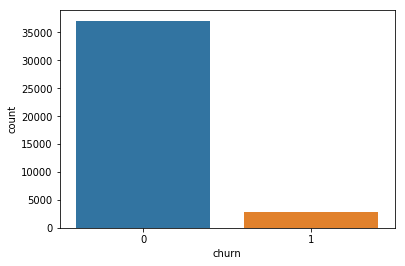

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(y_train)

In [0]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_tr_num_res, y_tr_num_res = sm.fit_sample(X_tr_num, y_train.ravel())

In [0]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_te_num_res, y_te_num_res = sm.fit_sample(X_te_num, y_test.ravel())

In [0]:
X_te_num_res.shape 

(18444, 41)

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc

model=MLPClassifier(hidden_layer_sizes=(130,75,50,30,10),batch_size=500,max_iter=500)

para = {'learning_rate_init':[0.01]}

clf = GridSearchCV(model,  para,cv=3,scoring='roc_auc',return_train_score=True,verbose=2,n_jobs=40)
clf.fit(X_te_num_res, y_te_num_res)
train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score']

In [0]:
clf.cv_results_

In [0]:
print("train AUC",train_auc)
print("CV AUC",cv_auc)

train AUC [0.9954992]
CV AUC [0.95130601]


In [0]:
from sklearn.metrics import roc_curve,auc 
model=MLPClassifier(hidden_layer_sizes=(130,75,50,30,10),learning_rate_init=0.01,batch_size=500,max_iter=500)
model.fit(X_tr_num_res, y_tr_num_res)

MLPClassifier(activation='relu', alpha=0.0001, batch_size=500, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(130, 75, 50, 30, 10),
              learning_rate='constant', learning_rate_init=0.01, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
y_test_pred= model.predict_proba(X_te_num)
roc_auc_score(y_test, y_test_pred[:,1])

0.6012187799489206

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_te_num_res, y_test_pred[:,1])

0.7601658899745692

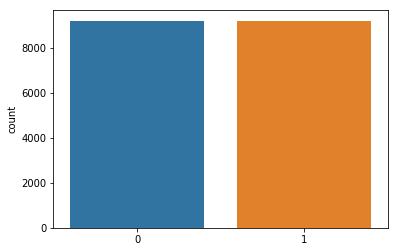

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(y_te_num_res)

In [0]:
len(X_te_num_res)
len(y_te_num_res)
len(y_test_pred)

25992

Upsampling:


In [0]:
cols=[i for i in train_cat.columns]
data=train_final.drop(cols,axis=1)

In [0]:
import seaborn as sns

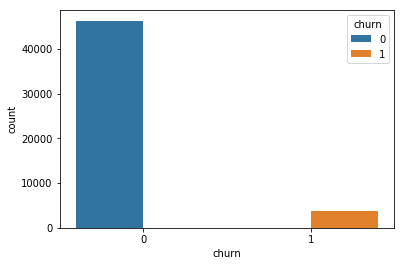

In [0]:
sns.countplot(data['churn'],hue=data['churn'])
plt.show()

In [0]:
data_0 = data[data['churn']==0]
data_1 = data[data['churn']==1]

In [0]:
from sklearn.utils import resample
data_1_upsampled = resample(data_1,replace=True,n_samples=data_0.shape[0],random_state=50)

In [0]:
print(data_1_upsampled.shape)
print(data_0.shape)

(46328, 42)
(46328, 42)


In [0]:
final_sampled_data=pd.concat([data_1_upsampled,data_0])
final_sampled_data.shape

(92656, 42)

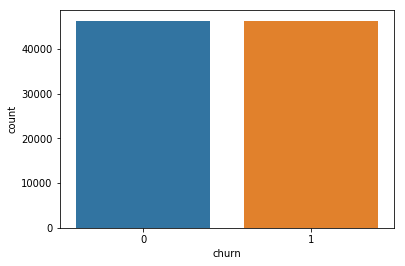

In [0]:
sns.countplot(final_sampled_data['churn'])
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_sampled_data.drop(['churn'],axis=1),final_sampled_data['churn'],test_size=0.2)

In [0]:
from sklearn.preprocessing import MinMaxScaler
  
for i in X_train.columns:
  if i!='churn':

        m = MinMaxScaler()
        X_train[i]=m.fit_transform(X_train[i].values.reshape(-1,1))   
        X_test[i]=m.transform(X_test[i].values.reshape(-1,1))
      

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc

model=MLPClassifier(hidden_layer_sizes=(130,75,10,2),batch_size=100,max_iter=500)

para = {'learning_rate_init':[0.001]}

clf = GridSearchCV(model,  para,cv=3,scoring='roc_auc',return_train_score=True,verbose=2,n_jobs=3)
clf.fit(X_train, y_train)
train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score']

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed: 46.7min finished


In [0]:
#This I ran Initially without normalizing the data and the result was devastating . 
#print("Train_AUC:",train_auc)
#print("CV_AUC : ",cv_auc)

Train_AUC: [0.50000675]
CV_AUC :  [0.50001349]


In [0]:
print("Train_AUC:",train_auc)
print("CV_AUC : ",cv_auc)

Train_AUC: [0.78453373]
CV_AUC :  [0.75162872]


In [0]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

model=MLPClassifier(hidden_layer_sizes=(130,75,50,30,10,2),learning_rate_init=0.001,batch_size=100,max_iter=500)
model.fit(X_train, y_train)

y_test_pred = model.predict_proba(X_test)
roc_auc_score(y_test, y_test_pred[:,1])

0.9548330029302081

In [0]:
y_test_pred = model.predict_proba(X_test)
roc_auc_score(y_test, y_test_pred[:,1])

0.9548330029302081

## Test sample without upsampling

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc

In [0]:
from sklearn.model_selection import train_test_split
data_train,data_test=train_test_split(data,test_size=0.2)

In [0]:
data_0 = data_train[data_train['churn']==0]
data_1 = data_train[data_train['churn']==1]

from sklearn.utils import resample
data_1_upsampled = resample(data_1,replace=True,n_samples=data_0.shape[0],random_state=50)


final_sampled_data=pd.concat([data_1_upsampled,data_0])
final_sampled_data.shape

X_train =  final_sampled_data.drop(['churn'],axis=1)
y_train = final_sampled_data['churn']
X_test = data_test.drop(['churn'],axis=1)
y_test = data_test['churn']


from sklearn.preprocessing import MinMaxScaler
  
for i in X_train.columns:
  if i!='churn':

        m = MinMaxScaler()
        X_train[i]=m.fit_transform(X_train[i].values.reshape(-1,1))   
        X_test[i]=m.transform(X_test[i].values.reshape(-1,1))
      


from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

model=MLPClassifier(hidden_layer_sizes=(130,75,50,30,10),learning_rate_init=0.001,batch_size=100,max_iter=500)
model.fit(X_train, y_train)

y_test_pred = model.predict_proba(X_test)
roc_auc_score(y_test, y_test_pred[:,1])


0.5966307119499122

In [0]:
model=MLPClassifier(hidden_layer_sizes=(1024,256,64,10),learning_rate_init=0.01,early_stopping=True,batch_size=100,max_iter=500)
model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size=100, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(1024, 256, 64, 10), learning_rate='constant',
              learning_rate_init=0.01, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
y_test_pred = model.predict_proba(X_test)
roc_auc_score(y_test, y_test_pred[:,1])

0.6390448526368927

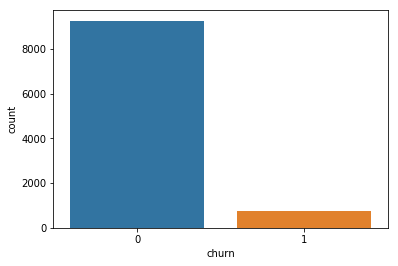

In [0]:
sns.countplot(y_test)
plt.show()

<h1>XGBClassifier

In [0]:
from xgboost import XGBClassifier
model=XGBClassifier(n_estimators=500,max_depth=2,class_weight='balanced')
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
roc_auc_score(y_test, y_test_pred)

0.6571282069853994

##**Appetency**

In [275]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[5,10,50,100,250,1000] , 'max_depth' :[2,4,10,16]}
xb1=XGBClassifier(class_weight='balanced')
clf1=GridSearchCV(xb1,parameters,cv=2,scoring='roc_auc',return_train_score=True,verbose=10,n_jobs=40)
clf1.fit(X_tr_final,y_train_app)
train_auc= clf1.cv_results_['mean_train_score']
cv_auc = clf1.cv_results_['mean_test_score']

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   4 out of  48 | elapsed:   22.0s remaining:  4.0min
[Parallel(n_jobs=40)]: Done   9 out of  48 | elapsed:  1.2min remaining:  5.2min
[Parallel(n_jobs=40)]: Done  14 out of  48 | elapsed:  2.5min remaining:  6.0min
[Parallel(n_jobs=40)]: Done  19 out of  48 | elapsed:  2.6min remaining:  3.9min
[Parallel(n_jobs=40)]: Done  24 out of  48 | elapsed:  3.9min remaining:  3.9min
[Parallel(n_jobs=40)]: Done  29 out of  48 | elapsed:  6.1min remaining:  4.0min
[Parallel(n_jobs=40)]: Done  34 out of  48 | elapsed:  7.3min remaining:  3.0min
[Parallel(n_jobs=40)]: Done  39 out of  48 | elapsed: 11.3min remaining:  2.6min
[Parallel(n_jobs=40)]: Done  44 out of  48 | elapsed: 13.6min remaining:  1.2min
[Parallel(n_jobs=40)]: Done  48 out of  48 | elapsed: 17.9min finished


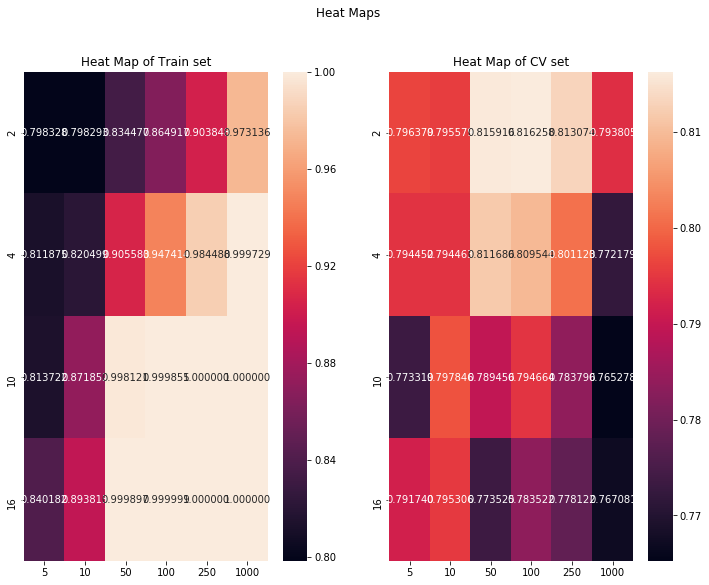

In [276]:
import numpy as np
import seaborn as sns
fig, (left, right) = plt.subplots(ncols=2, figsize=(12, 9))
t_auc=np.array(train_auc).reshape(4,6)
a=sns.heatmap(t_auc,annot=True,fmt="f",xticklabels=parameters['n_estimators'], yticklabels=parameters['max_depth'],ax=left)
left.set_title('Heat Map of Train set')
c_auc=np.array(cv_auc).reshape(4,6)
b=sns.heatmap(c_auc,annot=True,fmt="f",xticklabels=parameters['n_estimators'], yticklabels=parameters['max_depth'],ax=right)

right.set_title('Heat Map of CV set')
fig.suptitle("Heat Maps")
plt.show() 

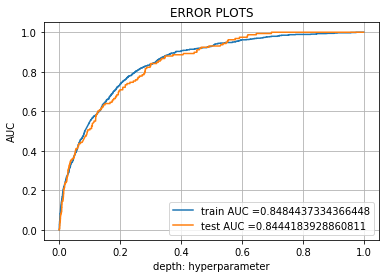

In [279]:
from sklearn.metrics import roc_curve,auc
best_esti=100
best_depth=2
xg4=XGBClassifier(n_estimators=best_esti,max_depth=best_depth,n_jobs=10,class_weight='balanced')
xg4.fit(X_tr_final,y_train_app)

y_train_pred = batch_predict(xg4,X_tr_final.tocsr())
y_test_pred = batch_predict(xg4,X_te_final.tocsr())

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_app, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test_app, y_test_pred)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
#Credits:AppliedaAIcourse.com
from sklearn.metrics import confusion_matrix
def predict(proba, threshould, fpr, tpr):
  t = threshould[np.argmax(fpr*(1-tpr))]
  # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
  predictions = []
  for i in proba:
    if i>=t:
      predictions.append(1)
    else:
      predictions.append(0)
    return predictions

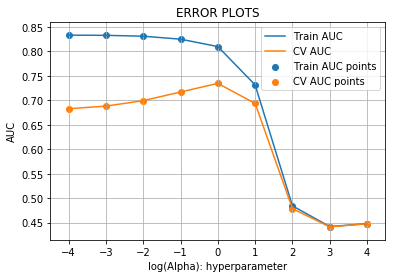

In [274]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
para = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}
clf = GridSearchCV(model, para, cv=5, scoring='roc_auc',return_train_score=True)
clf.fit(X_tr_final, y_train_app)
train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score']
from math import log
Alpha=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
plt.plot([log(y,10) for y in Alpha], train_auc, label='Train AUC')
plt.plot([log(y,10) for y in Alpha], cv_auc, label='CV AUC')
plt.scatter([log(y,10) for y in Alpha], train_auc, label='Train AUC points')
plt.scatter([log(y,10) for y in Alpha], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("log(Alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [0]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

model=DecisionTreeClassifier(criterion='gini', splitter='random')

para = {'max_depth':[1, 5, 10, 50, 100, 500,1000],'min_samples_split':[5, 10, 100, 500]}

clf = GridSearchCV(model, para, cv=3, scoring='roc_auc',return_train_score=True,verbose=2,n_jobs=40)
clf.fit(X_tr_final, y_train_app)
train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score']


In [0]:
import seaborn as sns
import numpy as np
fig, (left, right) = plt.subplots(ncols=2, figsize=(12, 9))
t_auc=np.array(train_auc).reshape(7,4)
a=sns.heatmap(t_auc,annot=True,fmt="f",xticklabels=min_split, yticklabels=Depth,ax=left)
left.set_title('Heat Map of Train set')
c_auc=np.array(cv_auc).reshape(7,4)
b=sns.heatmap(c_auc,annot=True,fmt="f",xticklabels=min_split, yticklabels=Depth,ax=right)
right.set_title('Heat Map of CV set')
fig.suptitle("Heat Maps")
plt.show()

##Upselling

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   4 out of  48 | elapsed:   30.2s remaining:  5.5min
[Parallel(n_jobs=40)]: Done   9 out of  48 | elapsed:  1.5min remaining:  6.4min
[Parallel(n_jobs=40)]: Done  14 out of  48 | elapsed:  1.9min remaining:  4.7min
[Parallel(n_jobs=40)]: Done  19 out of  48 | elapsed:  2.8min remaining:  4.2min
[Parallel(n_jobs=40)]: Done  24 out of  48 | elapsed:  4.1min remaining:  4.1min
[Parallel(n_jobs=40)]: Done  29 out of  48 | elapsed:  6.6min remaining:  4.3min
[Parallel(n_jobs=40)]: Done  34 out of  48 | elapsed:  7.6min remaining:  3.1min
[Parallel(n_jobs=40)]: Done  39 out of  48 | elapsed: 11.9min remaining:  2.7min
[Parallel(n_jobs=40)]: Done  44 out of  48 | elapsed: 14.5min remaining:  1.3min
[Parallel(n_jobs=40)]: Done  48 out of  48 | elapsed: 21.0min finished


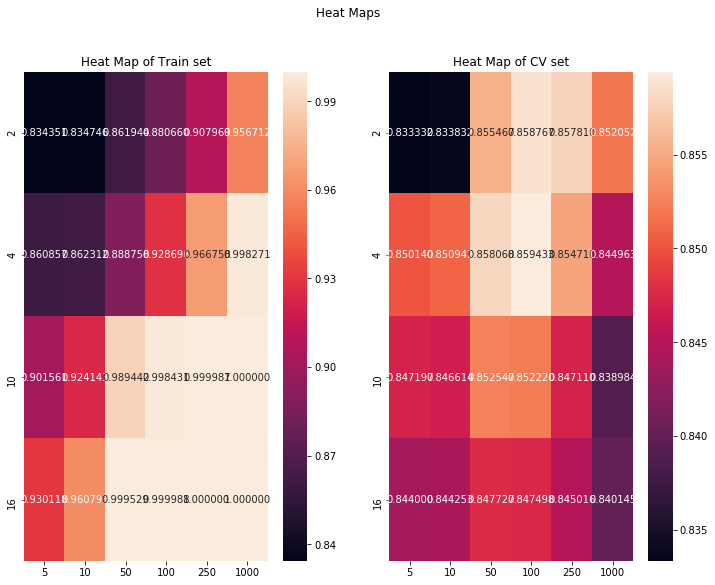

In [280]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[5,10,50,100,250,1000] , 'max_depth' :[2,4,10,16]}
xb1=XGBClassifier(class_weight='balanced')
clf1=GridSearchCV(xb1,parameters,cv=2,scoring='roc_auc',return_train_score=True,verbose=10,n_jobs=40)
clf1.fit(X_tr_final,y_train_up)
train_auc= clf1.cv_results_['mean_train_score']
cv_auc = clf1.cv_results_['mean_test_score']
import numpy as np
import seaborn as sns
fig, (left, right) = plt.subplots(ncols=2, figsize=(12, 9))
t_auc=np.array(train_auc).reshape(4,6)
a=sns.heatmap(t_auc,annot=True,fmt="f",xticklabels=parameters['n_estimators'], yticklabels=parameters['max_depth'],ax=left)
left.set_title('Heat Map of Train set')
c_auc=np.array(cv_auc).reshape(4,6)
b=sns.heatmap(c_auc,annot=True,fmt="f",xticklabels=parameters['n_estimators'], yticklabels=parameters['max_depth'],ax=right)

right.set_title('Heat Map of CV set')
fig.suptitle("Heat Maps")
plt.show()

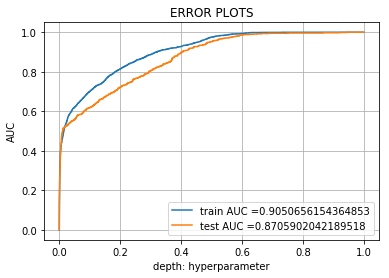

In [282]:
from sklearn.metrics import roc_curve,auc
best_esti=100
best_depth=4
xg4=XGBClassifier(n_estimators=best_esti,max_depth=best_depth,n_jobs=10,class_weight='balanced')
xg4.fit(X_tr_final,y_train_up)

y_train_pred = batch_predict(xg4,X_tr_final.tocsr())
y_test_pred = batch_predict(xg4,X_te_final.tocsr())

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_up, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test_up, y_test_pred)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
#Credits:AppliedaAIcourse.com
from sklearn.metrics import confusion_matrix
def predict(proba, threshould, fpr, tpr):
  t = threshould[np.argmax(fpr*(1-tpr))]
  # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
  predictions = []
  for i in proba:
    if i>=t:
      predictions.append(1)
    else:
      predictions.append(0)
    return predictions

##Conclusion : Final

We can see that using upsampling on the data both train ans the test an implemeting the MLP Classifier <br>
We are getting the good auc score around 0.95 .But using upsampling only for train set model overfits in train data. <br>

Till now the best model is XGBClassifier with n_iteration = 100 and depth = 2 which is giving a AUC score of 0.72 for churn<br>
It is cross validated and an tested on test data.<br>
For Appetency XGBClassifier is best model  AUC=0.84<br>
For Upsampling XGBClassifier is best model AUC=0.87<br>
and overall AUC =0.81


In [289]:
#Conclusion for CHURN
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Algorithm", "AUC","Remarks"]
x.add_row(["Multinomial NB/Baseline Model ", 0.62,"Good"])
x.add_row(["DecisionTreeClassifier ", 0.67,"Good"])
x.add_row(["XGBClassifierClassifier", 0.72,"Best - Class Weight is Balanced"])
x.add_row(["Upsampling/ MLPClassifier /SMOTE", 0.71,'Same as XGBClassifier without upsampling'])
x.add_row(["Upsampling/ MLPClassifier /SMOTE/On Train Data", 0.60,'Bad/ Overfitting'])
x.add_row(["Upsampling/ MLPClassifier /Upsampling", 0.90,'Good but data is upsampled'])
x.add_row(["Upsampling/ MLPClassifier /Upsampling/On Train Data", 0.60,'Overfitting'])

print(x)

+-----------------------------------------------------+------+------------------------------------------+
|                      Algorithm                      | AUC  |                 Remarks                  |
+-----------------------------------------------------+------+------------------------------------------+
|            Multinomial NB/Baseline Model            | 0.62 |                   Good                   |
|               DecisionTreeClassifier                | 0.67 |                   Good                   |
|               XGBClassifierClassifier               | 0.72 |     Best - Class Weight is Balanced      |
|           Upsampling/ MLPClassifier /SMOTE          | 0.71 | Same as XGBClassifier without upsampling |
|    Upsampling/ MLPClassifier /SMOTE/On Train Data   | 0.6  |             Bad/ Overfitting             |
|        Upsampling/ MLPClassifier /Upsampling        | 0.9  |        Good but data is upsampled        |
| Upsampling/ MLPClassifier /Upsampling/On Tra

After seeing the data Appetency and Upselling follows the same path but giving better results on XGBClassifier.

In [295]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Estimator","Model" ,"AUC"]
x.add_row(["Churn", "XGBClassifier n_iter=100, depth=2", 0.72])
x.add_row(["Appetency", "XGBClassifier n_iter=100, depth=2", 0.84])
x.add_row(["Upsampling","XGBClassifier n_iter=100, depth=4", 0.87])
x.add_row(["Total", "Overall", 0.81])
print(x)

+------------+-----------------------------------+------+
| Estimator  |               Model               | AUC  |
+------------+-----------------------------------+------+
|   Churn    | XGBClassifier n_iter=100, depth=2 | 0.72 |
| Appetency  | XGBClassifier n_iter=100, depth=2 | 0.84 |
| Upsampling | XGBClassifier n_iter=100, depth=4 | 0.87 |
|   Total    |              Overall              | 0.81 |
+------------+-----------------------------------+------+
